# 데이터 전처리

- 데이터를 분석하기에 좋은 형태로 만드는 과정
- Garbage In Garbage Out
    - 데이터 전처리가 중요한 근본적인 이유
    - 데이터 품질은 분석 결과 품질의 출발점

### 데이터 전처리의 필요성
- 데이터 품질이 높은 경우에도 전처리 필요
    - 구조적 형태가 분석 목적에 적합하지 않은 경우
    - 사용하는 툴, 기법에서 요구하는 데이터 형태
    - 데이터가 너무 많은 경우
    - 데이터 분석의 레벨이 데이터 저장 레벨과 다른 경우


- 데이터 품질을 낮추는 요인
    - 불완전(incomplete) : 데이터 필드가 비어 있는 경우
    - 잡음(noise) : 데이터에 오류가 포함된 경우
    - 모순(inconsistency) : 데이터 간 정합성, 일관성이 결여된 경우

### 데이터 전처리 주요 기법
- 데이터 정제
    - 결측치, 이상치, 잡음


- 데이터 결합


- 데이터 변환
    - Normalization, scaling


- 차원 축소
    - Feature selection
        - filter, wrapper, embedded
    - Feature extraction
        - PCA, SVD, FA, NMF

### 결측값(missing value) 처리
- 해당 데이터 행을 모두 제거(완전제거법)
- 수작업으로 채워 넣음
- 특정값 사용
- 핫덱(hot-deck) 대체법
    - 동일한 조사에서 다른 관측값으로부터 얻은 자료를 이용해 대체
    - 관측값 중 결측치와 비슷한 특성을 가진 것을 무작위 추출하여 대체
- 평균값 사용 (전체 평균 혹은 기준 속성 평균)
    - 표준오차 과소추정 발생
- 가장 가능성이 높은 값 사용 (회귀분석, 보간법 등)

## 데이터 인코딩

- 문자열을 숫자형으로 변환


- 인코딩 방식
    - 레이블 인코딩(Label encoding)
    - 원-핫 인코딩(One-hot encoding)

### 레이블 인코딩 (Label encoding)
- 문자열 데이터를 숫자로 코드화
- 범주형 자료의 수치화

**사이킷런의 레이블 인코딩 클래스 : LabelEncoder**
1. LabelEncoder 객체 생성
2. fit() 메서드
    - 레이블 인코더를 맞춤
3. transform() 메서드
    - 인코딩된 레이블 반환

In [3]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder() # 객체로 만듦
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

LabelEncoder 객체의 classes_ : 인코딩된 문자열 값 목록 확인

In [4]:
# 인코딩 전 원래의 값 확인 : encoder.classes_ 속성
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

inverse_transform() : 인코딩된 값을 다시 디코딩

In [5]:
# 인코딩된 값 디코딩
encoder.inverse_transform([1, 4, 5, 0])

array(['냉장고', '전자렌지', '컴퓨터', 'TV'], dtype='<U4')

### 원-핫 인코딩(One-Hot encoding)

- feature 값의 유형에 따라 새로운 feature를 추가하여
- 고유 값에 해당하는 컬럼만 1을 표시하고 나머지 컬럼에는 0을 표시

- 범주형 변수를 독립변수로 갖는 회귀분석의 경우 범주형 변수를 dummy 변수로 변환


**사이킷런에서 원-핫 인코딩 클래스 : OneHotEncoder**

**원-핫 인코딩 변환 과정**
1. 문자열 값을 숫자형 값으로 변환
2. 입력 값을 2차원 데이터로 변환
3. OneHotEncoder 클래스로 원-핫 인코딩 적용
    - fit()
    - transform()

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 1. 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [8]:
labels.shape

(8,)

In [12]:
# 2. 2차원 데이터로 변환
labels = labels.reshape(-1, 1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [13]:
labels.shape

(8, 1)

In [14]:
# 3. 원-핫 인코딩을 적용 
one_encoder = OneHotEncoder()

one_encoder.fit(labels)
one_labels = one_encoder.transform(labels)
# fit과 transform을 한번에 사용해도 됨: one_encoder.fit_transform(labels)

one_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
# sparse matrix : 희소행렬 (행렬의 값이 대부분 0인 경우)

In [15]:
print(one_labels)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [16]:
# 2차원 형태로 출력
one_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [17]:
# 원-핫 인코딩 전체 과정

# 1. 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
# 2. 2차원 데이터로 변환
# 3. 원-핫 인코딩을 적용

### Pandas API 사용 원-핫 인코딩 수행
- get_dummies() 메서드 사용
- 숫자형으로 변환없이 바로 변환

In [19]:
import pandas as pd

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

df = pd.DataFrame(items)
df

,0
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [20]:
pd.get_dummies(df)

,0_TV,0_냉장고,0_믹서,0_선풍기,0_전자렌지,0_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [21]:
# Pandas 데이터프레임을 NumPy 배열로 변환
pd.get_dummies(df).to_numpy()

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

### 데이터 전처리 주요 기법

* 데이터 정제 : 결측치, 이상치, 잡음
* 데이터 결합
* 데이터 변환 : Nomalization, scaling
* 차원 축소
    - Feature selection: filter, wrapper, embedded
    - Feature extraction: PCA, SVD, FA, NMF

### 피처 스케일링과 정규화

- 피처 스케일링(feature scaling)
    - 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤


- 방식
    - Z-scaling

    - Min-max

    - 벡터 정규화


In [22]:
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

StandardScaler
* 표준화 지원 클래스
* 개별 피처를 평균이 0이고 분산이 1인 값으로 변환

StandardScaler 이용 표준화해서 변환

1. StandardScaler 객체 생성
2. fit() : 데이터 변환을 위한 기준 정보 설정
3. transform() : fit()에서 설정된 정보를 이용해 데이터 변환
    - scale 변환된 데이터 셋이 numpy ndarray로 반환

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled_df = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [29]:
iris_scaled_df.mean()

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

In [30]:
iris_scaled_df.std()

sepal length (cm)    0.230018
sepal width (cm)     0.181611
petal length (cm)    0.299203
petal width (cm)     0.317599
dtype: float64

MinMaxScaler
* 데이터값을 0과 1사이의 범위 값으로 변환
* 음수인 경우 -1에서 1사이의 값으로 변환
* 데이터의 분포가 가우시안 분포가 아닌 경우 Min, Max Scale 적용 가능
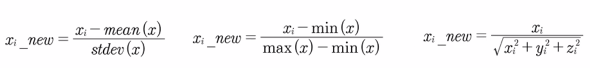

MinMaxScaler 이용 변환

1. MinMaxScaler 객체 생성
2. fit()
3. transform() : scale 변환된 데이터 셋이 numpy ndarray로 반환

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled_df = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [33]:
iris_scaled_df.min()

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

In [34]:
iris_scaled_df.max()

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

In [32]:
# 각 피처 값 확인
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점 

* 학습 데이터와 텍스트 데이터의 스케일링 기준 정보 달라지지 않게 주의
* 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일러 기준에 따라야 함
* Scaler 객체를 이용해 학습 데이터의 스케일러 기준에 따라야 함
* 테스트 데이터에 다시 fit()을 적용해서는 안되며, 학습데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함

## [참고] 데이터 변환

**자료 변환을 통해 자료의 해석을 쉽고 풍부하게 하기 위한 과정**

**데이터 변환 목적**
- 분포의 대칭화
- 산포를 비슷하게
- 변수 간의 관계를 단순하게 하기 위해

**데이터 변환 종류**
- 모양 변환 : pivot, unpivot
- 파생변수/요약변수
- Normalization (scaling)
- 데이터 분포 변환 : 제곱근 변환, 제곱변환, 지수변환, 로그변환, 박스콕스변환

### 모양변환
**Pivot**
- 행,열 별 요약된 값으로 정렬해서 분석을 하고자 할 때 사용

**Unpivot**
- 컬럼 형태로 되어 있는 것을 행 형태로 바꿀 때 사용 (wide form→long form)

### 파생변수/요약변수
**파생변수**
- 이미 수집된 변수를 활용해 새로운 변수 생성하는 경우
- 분석자가 특정 조건을 만족하거나 특정 함수에 의해 값을 만들어 의미를 부여한 변수
- 주관적일 수 있으며 논리적 타당성을 갖추어 개발해야 함
- 예. 주구매 매장, 구매상품다양성, 가격선호대, 라이프스타일

**요약 변수**
- 원 데이터를 분석 Needs에 맞게 종합한 변수
- 데이터의 수준을 달리하여 종합하는 경우가 많음
- 예. 총구매금액, 매장별 방문횟수, 매장이용횟수, 구매상품목록

### 정규화(Normalization)
- 단위 차이, 극단값 등으로 비교가 어렵거나 왜곡이 발생할 때, 표준화하여 비교 가능하게 만드는 방법
- Scale이 다른 여러 변수에 대해 Scale을 맞춰 모든 데이터 포인트가 동일한 정도의 중요도로 비교되도록 함
- Scaling 여부가 모델링의 성능에도 영향을 주기도 함